<a href="https://colab.research.google.com/github/engmanuelricardoperez/UPTC-rainfall_prediction/blob/main/1_2023Q2_MLR_RF_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-2023Q2 - Monthly Rainfall Prediction Using Machine Learning Techniques: A Comparative Study of MLR, RF and XGBoost GD

Presented by:

Manuel Ricardo Perez manuelricardo.perez@uptc.edu.co

# 1. Load Data

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import io
wind_speed = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/velocidad_viento.csv')

precipitation = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/precipitacion.csv')
precipitation_open_data = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/precipitaciones.csv')
humidity = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/humedad.csv')
temmin = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/temmin.csv')
temmax = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/temmax.csv')

sun2001 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2001.csv')
sun2002 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2002.csv')
sun2003 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2003.csv')
sun2004 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2004.csv')
sun2005 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2005.csv')
sun2006 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2006.csv')
sun2007 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2007.csv')
sun2008 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2008.csv')
sun2009 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2009.csv')
sun2010 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2010.csv')
sun2011 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2011.csv')
sun2012 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2012.csv')
sun2013 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2013.csv')
sun2014 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2014.csv')
sun2015 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2015.csv')
sun2016 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2016.csv')
sun2017 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2017.csv')
sun2018 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2018.csv')
sun2019 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2019.csv')
sun2020 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2020.csv')
sun2021 = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/sol2021.csv')

evaporation = pd.read_csv('/content/drive/MyDrive/phd/deployment proyect/phd/Rainfall Prediction UPTC/Data/Stations Boyacá 2022/datos/evaporacion.csv')


# Data Porccessing

## Solar

In [4]:
sun_frames = [sun2001, sun2002, sun2003, sun2004, sun2005, sun2006, sun2007, sun2008, sun2009, sun2010, sun2011, sun2012, sun2013, sun2014, sun2015, sun2016, sun2017, sun2018, sun2019, sun2020, sun2021]
sun = pd.concat(sun_frames)

In [5]:
sun['Date'] = pd.to_datetime(sun['Fecha']).dt.date
sun['Time'] = pd.to_datetime(sun['Fecha']).dt.time

In [6]:
sun = sun.groupby(['Date']).mean('Valor')

In [7]:
sun['SunValue'] = sun['Valor']

## Temperature min


In [8]:
temmin['Date'] = pd.to_datetime(temmin['Fecha']).dt.date
temmin['Time'] = pd.to_datetime(temmin['Fecha']).dt.time

In [9]:
temmin['TemMinValue'] = temmin['Valor']

## Temperature max

In [10]:
temmax['Date'] = pd.to_datetime(temmax['Fecha']).dt.date
temmax['Time'] = pd.to_datetime(temmax['Fecha']).dt.time

In [11]:
temmax['TemMaxValue'] = temmax['Valor']

## Wind Speed

In [12]:
# velocidadviento['Date'] = pd.to_datetime(velocidadviento['Fecha']).dt.date
# velocidadviento['Time'] = pd.to_datetime(velocidadviento['Fecha']).dt.time

## Humedad

In [13]:
humidity['Date'] = pd.to_datetime(humidity['Fecha']).dt.date
humidity['Time'] = pd.to_datetime(humidity['Fecha']).dt.time

In [14]:
humidity['HumidityValue'] = humidity['Valor']

## Evaporación

In [15]:
evaporation['Date'] = pd.to_datetime(evaporation['Fecha']).dt.date
evaporation['Time'] = pd.to_datetime(evaporation['Fecha']).dt.time

In [16]:
evaporation['EvaporationValue'] = evaporation['Valor']

## Precipitación

In [17]:
precipitation['Date'] = pd.to_datetime(precipitation['Fecha']).dt.date
precipitation['Time'] = pd.to_datetime(precipitation['Fecha']).dt.time

In [18]:
precipitation['PrecipitationValue'] = precipitation['Valor']

## Speed Wind 10 Minutes

In [19]:
wind_speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661715 entries, 0 to 661714
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CodigoEstacion     661715 non-null  int64  
 1   CodigoSensor       661715 non-null  int64  
 2   FechaObservacion   661715 non-null  object 
 3   ValorObservado     661715 non-null  float64
 4   NombreEstacion     661715 non-null  object 
 5   Departamento       661715 non-null  object 
 6   Municipio          661715 non-null  object 
 7   ZonaHidrografica   661715 non-null  object 
 8   Latitud            661715 non-null  float64
 9   Longitud           661715 non-null  float64
 10  DescripcionSensor  661715 non-null  object 
 11  UnidadMedida       661715 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 60.6+ MB


In [20]:
column = wind_speed["FechaObservacion"]
max_value = column.max()
min_value = column.min()

print("Min: " + min_value + " Max: " + max_value)

Min: 01/01/2006 01:00:00 AM Max: 12/31/2021 12:50:00 PM


In [21]:
wind_speed['Date'] = pd.to_datetime(wind_speed['FechaObservacion'])
wind_speed = wind_speed.groupby(pd.Grouper(key='Date', freq='D')).mean()

<ipython-input-21-387bc8da60b7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wind_speed = wind_speed.groupby(pd.Grouper(key='Date', freq='D')).mean()


In [22]:
wind_speed

,CodigoEstacion,CodigoSensor,ValorObservado,Latitud,Longitud
Date,,,,,
2005-04-21,24035430.0,103.0,1.063889,5.745917,-73.116361
2005-04-22,24035430.0,103.0,1.149306,5.745917,-73.116361
2005-04-23,24035430.0,103.0,1.215972,5.745917,-73.116361
2005-04-24,24035430.0,103.0,0.994444,5.745917,-73.116361
2005-04-25,24035430.0,103.0,1.112319,5.745917,-73.116361
...,...,...,...,...,...
2022-06-24,24035430.0,103.0,1.048252,5.745917,-73.116361
2022-06-25,24035430.0,103.0,0.865116,5.745917,-73.116361
2022-06-26,24035430.0,103.0,0.820139,5.745917,-73.116361


In [23]:
wind_speed['WindSpeedValue'] = wind_speed['ValorObservado']

In [24]:
sun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7291 entries, 2000-12-31 to 2021-12-31
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CodigoEstacion   7291 non-null   float64
 1   Latitud          7291 non-null   float64
 2   Longitud         7291 non-null   float64
 3   Altitud          7291 non-null   float64
 4   FechaSuspension  0 non-null      float64
 5   Valor            7291 non-null   float64
 6   Grado            7291 non-null   float64
 7   Calificador      0 non-null      float64
 8   NivelAprobacion  7291 non-null   float64
 9   SunValue         7291 non-null   float64
dtypes: float64(10)
memory usage: 626.6+ KB


In [25]:
wind_speed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6278 entries, 2005-04-21 to 2022-06-28
Freq: D
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CodigoEstacion  5456 non-null   float64
 1   CodigoSensor    5456 non-null   float64
 2   ValorObservado  5456 non-null   float64
 3   Latitud         5456 non-null   float64
 4   Longitud        5456 non-null   float64
 5   WindSpeedValue  5456 non-null   float64
dtypes: float64(6)
memory usage: 343.3 KB


In [26]:
precipitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CodigoEstacion      1826 non-null   int64  
 1   NombreEstacion      1826 non-null   object 
 2   Latitud             1826 non-null   float64
 3   Longitud            1826 non-null   float64
 4   Altitud             1826 non-null   int64  
 5   Categoria           1826 non-null   object 
 6   Entidad             1826 non-null   object 
 7   AreaOperativa       1826 non-null   object 
 8   Departamento        1826 non-null   object 
 9   Municipio           1826 non-null   object 
 10  FechaInstalacion    1826 non-null   object 
 11  FechaSuspension     0 non-null      float64
 12  IdParametro         1826 non-null   object 
 13  Etiqueta            1826 non-null   object 
 14  DescripcionSerie    1826 non-null   object 
 15  Frecuencia          1826 non-null   object 
 16  Fecha 

In [27]:
humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714 entries, 0 to 5713
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CodigoEstacion    5714 non-null   int64  
 1   NombreEstacion    5714 non-null   object 
 2   Latitud           5714 non-null   float64
 3   Longitud          5714 non-null   float64
 4   Altitud           5714 non-null   int64  
 5   Categoria         5714 non-null   object 
 6   Entidad           5714 non-null   object 
 7   AreaOperativa     5714 non-null   object 
 8   Departamento      5714 non-null   object 
 9   Municipio         5714 non-null   object 
 10  FechaInstalacion  5714 non-null   object 
 11  FechaSuspension   0 non-null      float64
 12  IdParametro       5714 non-null   object 
 13  Etiqueta          5714 non-null   object 
 14  DescripcionSerie  5714 non-null   object 
 15  Frecuencia        5714 non-null   object 
 16  Fecha             5714 non-null   object 


In [28]:
evaporation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CodigoEstacion    6072 non-null   int64  
 1   NombreEstacion    6072 non-null   object 
 2   Latitud           6072 non-null   float64
 3   Longitud          6072 non-null   float64
 4   Altitud           6072 non-null   int64  
 5   Categoria         6072 non-null   object 
 6   Entidad           6072 non-null   object 
 7   AreaOperativa     6072 non-null   object 
 8   Departamento      6072 non-null   object 
 9   Municipio         6072 non-null   object 
 10  FechaInstalacion  6072 non-null   object 
 11  FechaSuspension   0 non-null      float64
 12  IdParametro       6072 non-null   object 
 13  Etiqueta          6072 non-null   object 
 14  DescripcionSerie  6072 non-null   object 
 15  Frecuencia        6072 non-null   object 
 16  Fecha             6072 non-null   object 


In [29]:
temmin.info()
temmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CodigoEstacion    7049 non-null   int64  
 1   NombreEstacion    7049 non-null   object 
 2   Latitud           7049 non-null   float64
 3   Longitud          7049 non-null   float64
 4   Altitud           7049 non-null   int64  
 5   Categoria         7049 non-null   object 
 6   Entidad           7049 non-null   object 
 7   AreaOperativa     7049 non-null   object 
 8   Departamento      7049 non-null   object 
 9   Municipio         7049 non-null   object 
 10  FechaInstalacion  7049 non-null   object 
 11  FechaSuspension   0 non-null      float64
 12  IdParametro       7049 non-null   object 
 13  Etiqueta          7049 non-null   object 
 14  DescripcionSerie  7049 non-null   object 
 15  Frecuencia        7049 non-null   object 
 16  Fecha             7049 non-null   object 


In [30]:
precipitation_open_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10989979 entries, 0 to 10989978
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CodigoEstacion     int64  
 1   CodigoSensor       int64  
 2   FechaObservacion   object 
 3   ValorObservado     float64
 4   NombreEstacion     object 
 5   Departamento       object 
 6   Municipio          object 
 7   ZonaHidrografica   object 
 8   Latitud            float64
 9   Longitud           float64
 10  DescripcionSensor  object 
 11  UnidadMedida       object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1006.2+ MB


In [31]:
column_precipitation_open_data = precipitation_open_data["FechaObservacion"]
max_value_precipitation_open_data = column_precipitation_open_data.max()
min_value_precipitation_open_data = column_precipitation_open_data.min()

print("Min: " + min_value_precipitation_open_data + " Max: " + max_value_precipitation_open_data)

Min: 01/01/2006 01:00:00 AM Max: 12/31/2021 12:55:00 PM


In [32]:
precipitation_open_data['Date'] = pd.to_datetime(precipitation_open_data['FechaObservacion']).dt.date
precipitation_open_data['Time'] = pd.to_datetime(precipitation_open_data['FechaObservacion']).dt.time
precipitation_open_data = precipitation_open_data.groupby(['Date']).mean('ValorObservado')

In [33]:
precipitation_open_data['PrecipitationValue'] = precipitation_open_data['ValorObservado']

In [34]:
precipitation_open_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6241 entries, 2005-04-19 to 2022-06-28
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CodigoEstacion      6241 non-null   float64
 1   CodigoSensor        6241 non-null   float64
 2   ValorObservado      6241 non-null   float64
 3   Latitud             6241 non-null   float64
 4   Longitud            6241 non-null   float64
 5   PrecipitationValue  6241 non-null   float64
dtypes: float64(6)
memory usage: 341.3+ KB


In [35]:
sun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7291 entries, 2000-12-31 to 2021-12-31
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CodigoEstacion   7291 non-null   float64
 1   Latitud          7291 non-null   float64
 2   Longitud         7291 non-null   float64
 3   Altitud          7291 non-null   float64
 4   FechaSuspension  0 non-null      float64
 5   Valor            7291 non-null   float64
 6   Grado            7291 non-null   float64
 7   Calificador      0 non-null      float64
 8   NivelAprobacion  7291 non-null   float64
 9   SunValue         7291 non-null   float64
dtypes: float64(10)
memory usage: 626.6+ KB


In [36]:
humidity.Date.max()

datetime.date(2021, 7, 31)

In [37]:
humidity.Date.min()

datetime.date(2001, 1, 1)

In [38]:
temmax.Date.max()

datetime.date(2022, 1, 1)

In [39]:
temmax.Date.min()

datetime.date(2001, 1, 1)

In [40]:
temmin.Date.max()

datetime.date(2022, 1, 1)

In [41]:
temmin.Date.min()

datetime.date(2001, 1, 1)

# Build Data Set

## Sun

In [42]:
x_sun = sun[['SunValue']]

In [43]:
x_sun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7291 entries, 2000-12-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SunValue  7291 non-null   float64
dtypes: float64(1)
memory usage: 113.9+ KB


In [44]:
x_sun.describe()

,SunValue
count,7291.000000
mean,0.299643
std,0.183576
min,0.000000
25%,0.150000
50%,0.292857
75%,0.435714
max,0.757143


## Temperature Min

In [45]:
x_temmin = temmin[['Date', 'TemMinValue']]

In [46]:
x_temmin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         7049 non-null   object 
 1   TemMinValue  7049 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.3+ KB


In [47]:
x_temmin.describe()

,TemMinValue
count,7049.000000
mean,7.260817
std,2.669100
min,-5.200000
25%,5.400000
50%,7.400000
75%,9.400000
max,13.600000


## Temperature Max

In [48]:
x_temmax = temmax[['Date', 'TemMaxValue']]

In [49]:
x_temmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7054 entries, 0 to 7053
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         7054 non-null   object 
 1   TemMaxValue  7054 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.3+ KB


In [50]:
x_temmax.describe()

,TemMaxValue
count,7054.000000
mean,22.174936
std,1.856672
min,11.800000
25%,21.000000
50%,22.200000
75%,23.400000
max,29.000000


## Humidity

In [51]:
x_humidity = humidity[['Date', 'HumidityValue']]

In [52]:
x_humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714 entries, 0 to 5713
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           5714 non-null   object
 1   HumidityValue  5714 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.4+ KB


In [53]:
x_humidity.describe()

,HumidityValue
count,5714.000000
mean,55.136857
std,13.800160
min,-24.000000
25%,46.000000
50%,55.000000
75%,64.000000
max,100.000000


## Precipitation

In [54]:
x_precipitation = precipitation_open_data['PrecipitationValue']

In [55]:
x_precipitation

Date
2005-04-19    0.231707
2005-04-20    0.040418
2005-04-21    0.011150
2005-04-22    0.008727
2005-04-23    0.026829
                ...   
2022-06-24    0.029615
2022-06-25    0.022506
2022-06-26    0.059571
2022-06-27    0.018426
2022-06-28    0.050657
Name: PrecipitationValue, Length: 6241, dtype: float64

In [56]:
x_precipitation.describe()

count    6241.000000
mean        0.034454
std         0.049334
min         0.000000
25%         0.003730
50%         0.018452
75%         0.046179
max         1.043830
Name: PrecipitationValue, dtype: float64

## Join Datasets

In [57]:
dataset = pd.merge(pd.merge(pd.merge(pd.merge(x_sun,x_temmin,on='Date'),x_temmax,on='Date'),x_humidity,on='Date'),x_precipitation,on='Date')

## Bulding; Year, Month, Day

In [58]:
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day

In [59]:
x = dataset[['year', 'month', 'day', 'TemMaxValue', 'TemMinValue', 'HumidityValue', 'SunValue']]
x_MLR = dataset[['TemMaxValue', 'TemMinValue', 'HumidityValue', 'SunValue']]
x_RF = dataset[['year', 'month','TemMinValue', 'HumidityValue', 'SunValue']]
x_XGB = dataset[['year', 'month', 'TemMinValue', 'HumidityValue', 'SunValue']]
x_MLP = dataset[['year', 'month', 'TemMinValue', 'HumidityValue', 'SunValue']]
y = dataset[['PrecipitationValue']]

In [60]:
x

,year,month,day,TemMaxValue,TemMinValue,HumidityValue,SunValue
0,2005,4,19,22.6,5.2,44,0.264286
1,2005,4,20,21.2,8.6,66,0.000000
2,2005,4,21,20.4,7.0,89,0.157143
3,2005,4,22,21.8,9.5,63,0.192857
4,2005,4,23,20.8,8.2,76,0.007143
...,...,...,...,...,...,...,...
3929,2021,7,27,20.4,7.6,66,0.228571
3930,2021,7,28,20.0,10.8,62,0.064286
3931,2021,7,29,22.0,10.4,54,0.000000
3932,2021,7,30,19.6,9.2,53,0.207143


In [61]:
y

,PrecipitationValue
0,0.231707
1,0.040418
2,0.011150
3,0.008727
4,0.026829
...,...
3929,0.031267
3930,0.044365
3931,0.023773
3932,0.023834


In [62]:
y.describe()

,PrecipitationValue
count,3934.000000
mean,0.036911
std,0.053955
min,0.000000
25%,0.004186
50%,0.019512
75%,0.049630
max,1.043830


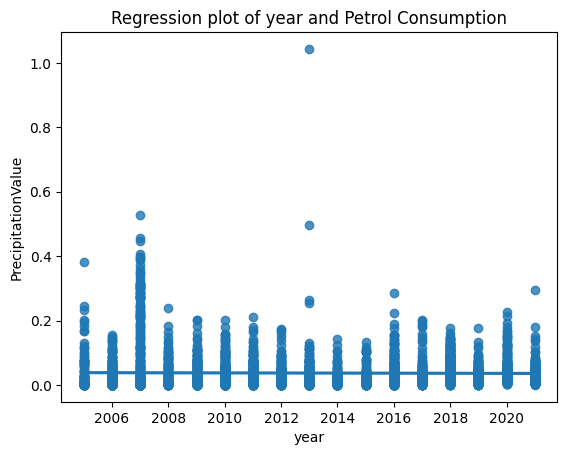

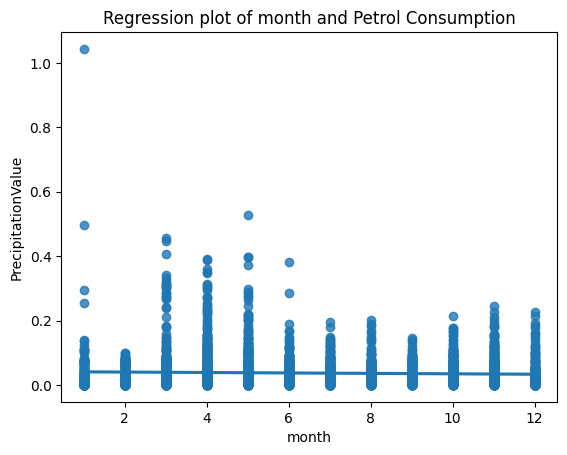

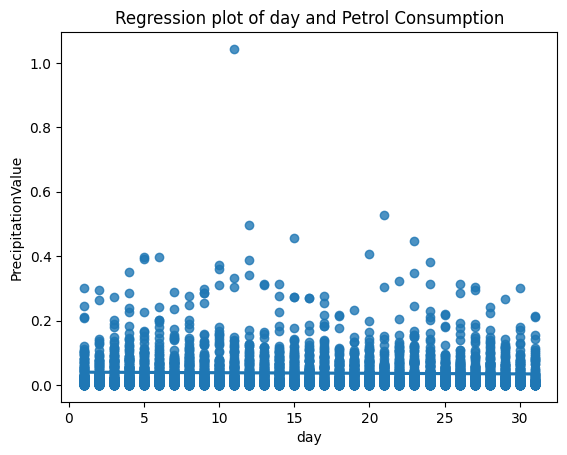

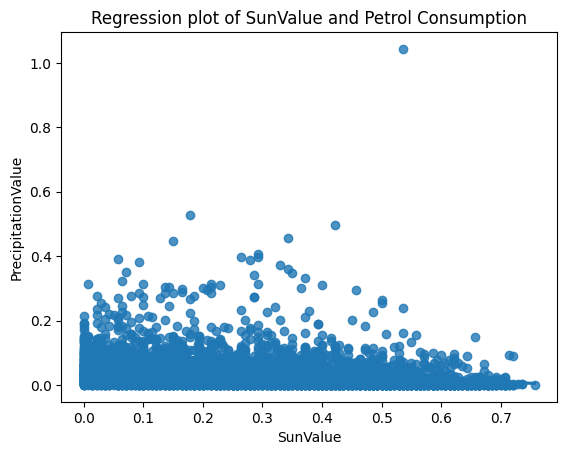

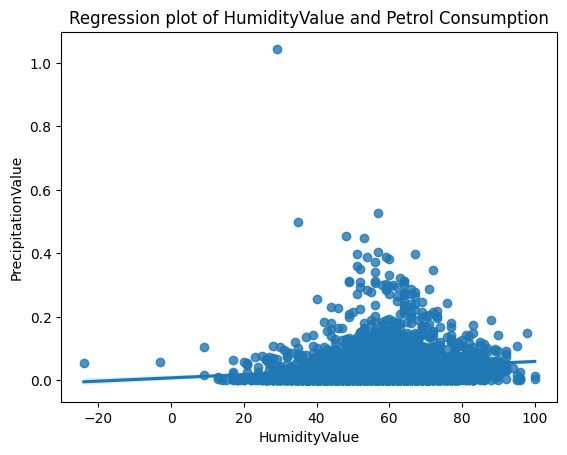

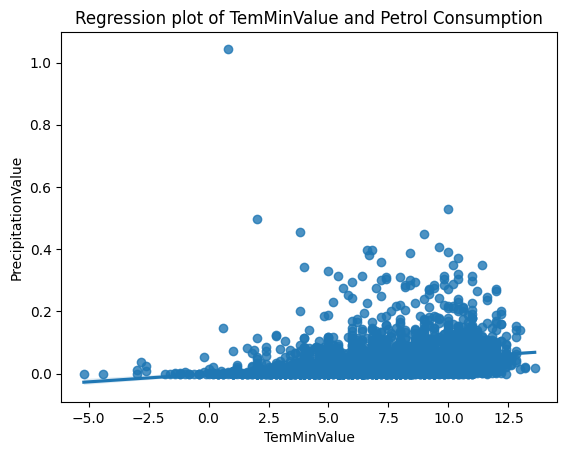

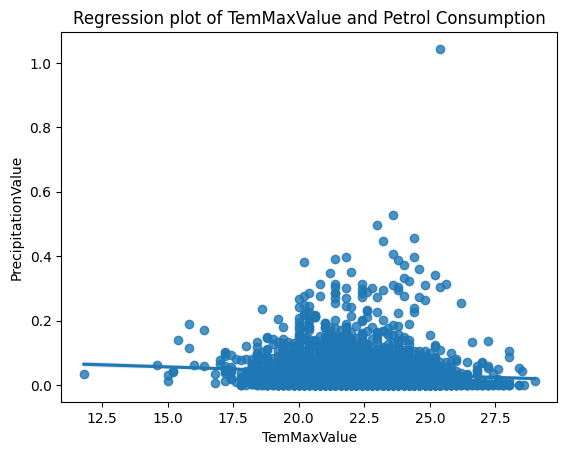

In [63]:
import seaborn as sns # Convention alias for Seaborn
import matplotlib.pyplot as plt

variables = ['year', 'month', 'day', 'SunValue', 'HumidityValue', 'TemMinValue','TemMaxValue']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='PrecipitationValue', data=dataset).set(title=f'Regression plot of {var} and Petrol Consumption');

<ipython-input-64-03870d7fa38a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = dataset.corr()


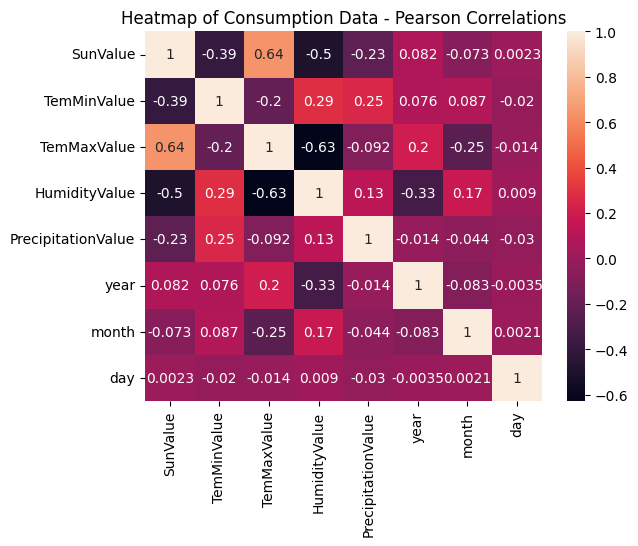

In [64]:
correlations = dataset.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

# Bulding Models

## Multivariable Linear Regression (MLR)

**Original equation:**
$$ Daily rainfall = year ∗ β1
 + (month ∗ β2) + day ∗ β3
 + (MaxTemp ∗ β4) + (MinTemp ∗ β5) + Humidity ∗ β6
 + (Evaporation ∗ β7) + (sunshine ∗ β8) + (windspeed ∗ β9) + εi $$

**Equation adapted to data availability:**
$$ Daily rainfall = year ∗ β1
 + (month ∗ β2) + day ∗ β3
 + (MaxTemp ∗ β4) + (MinTemp ∗ β5) + Humidity ∗ β6
 + (sunshine ∗ β7) + εi $$

In [65]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)
x_MLR_train, x_MLR_test, y_train, y_test = train_test_split(x_MLR, y, test_size = 0.4, random_state = 42)
x_RF_train, x_RF_test, y_train, y_test = train_test_split(x_RF, y, test_size = 0.4, random_state = 42)
x_XGB_train, x_XGB_test, y_train, y_test = train_test_split(x_XGB, y, test_size = 0.4, random_state = 42)
x_MLP_train, x_MLP_test, y_train, y_test = train_test_split(x_MLP, y, test_size = 0.4, random_state = 42)

In [66]:
y_test.shape

(1574, 1)

In [67]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
model_MLR = LinearRegression()
# fitting the training data
model_MLR.fit(x_train,y_train)

# creating an object of LinearRegression class
model_MLR_2 = LinearRegression()
# fitting the training data
model_MLR_2.fit(x_MLR_train,y_train)

LinearRegression()

In [68]:
y_prediction_MLR =  model_MLR.predict(x_test)
y_prediction_MLR_2 =  model_MLR_2.predict(x_MLR_test)
y_prediction_MLR

array([[0.06121868],
       [0.02031699],
       [0.05261473],
       ...,
       [0.02965947],
       [0.05284607],
       [0.03379588]])

In [69]:
feature_names = x.columns
model_coefficients_MLR = model_MLR.coef_.reshape(-1,1)

coefficients_MLR_df = pd.DataFrame(data = model_coefficients_MLR, index = feature_names, columns = ['Coefficient value'])

print(coefficients_MLR_df)

               Coefficient value
year                   -0.000306
month                  -0.000792
day                    -0.000089
TemMaxValue             0.002002
TemMinValue             0.004046
HumidityValue           0.000134
SunValue               -0.061168


In [70]:
y_prediction_MLR.shape

(1574, 1)

In [71]:
y_test.shape

(1574, 1)

In [72]:
results = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_prediction_MLR]})
print(results)

                                              Actual  \
0        PrecipitationValue
1593            0.015...   

                                           Predicted  
0  [[0.061218682473771824], [0.020316993270939054...  


In [73]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [74]:
from sklearn.metrics import mean_absolute_error
MAE_MLR = mean_absolute_error(y_test, y_prediction_MLR)
MAE_MLR_2 = mean_absolute_error(y_test, y_prediction_MLR_2)
print('Mean Absolute Error:', round(np.mean(MAE_MLR), 4), 'degrees.')
print('Mean Absolute Error:', round(np.mean(MAE_MLR_2), 4), 'degrees.')


Mean Absolute Error: 0.0313 degrees.
Mean Absolute Error: 0.0311 degrees.


In [75]:
from sklearn.metrics import mean_squared_error
RMSE_MLR = mean_squared_error(y_test, y_prediction_MLR)
RMSE_MLR_2 = mean_squared_error(y_test, y_prediction_MLR_2)
print('Mean Squared Error:', round(np.mean(RMSE_MLR), 4), 'degrees.')
print('Mean Squared Error:', round(np.mean(RMSE_MLR_2), 4), 'degrees.')

Mean Squared Error: 0.0031 degrees.
Mean Squared Error: 0.0031 degrees.


In [76]:
R2_SCORE_MLR = r2_score(y_test, y_prediction_MLR)
R2_SCORE_MLR_2 = r2_score(y_test, y_prediction_MLR_2)
print('R2 Score:', round(R2_SCORE_MLR, 4), 'degrees.')
print('R2 Score:', round(R2_SCORE_MLR_2, 4), 'degrees.')

R2 Score: 0.064 degrees.
R2 Score: 0.0585 degrees.


## Random Forest

In [77]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
model_RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model_RF_2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
model_RF.fit(x_train, y_train);
model_RF_2.fit(x_RF_train, y_train);

<ipython-input-77-760ca4df8a2b>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(x_train, y_train);
<ipython-input-77-760ca4df8a2b>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF_2.fit(x_RF_train, y_train);


In [78]:
# Use the forest's predict method on the test data
y_prediction_RF = model_RF.predict(x_test)
y_prediction_RF = y_prediction_RF.reshape(1574,1)

y_prediction_RF_2 = model_RF_2.predict(x_RF_test)
y_prediction_RF_2 = y_prediction_RF_2.reshape(1574,1)

In [79]:
from sklearn.metrics import mean_absolute_error
MAE_RF = mean_absolute_error(y_test, y_prediction_RF)
MAE_RF_2 = mean_absolute_error(y_test, y_prediction_RF_2)

print('Mean Absolute Error:', round(np.mean(MAE_RF), 4), 'degrees.')
print('Mean Absolute Error:', round(np.mean(MAE_RF_2), 4), 'degrees.')

Mean Absolute Error: 0.0285 degrees.
Mean Absolute Error: 0.0281 degrees.


In [80]:
from sklearn.metrics import mean_squared_error
RMSE_RF = mean_squared_error(y_test, y_prediction_RF)
RMSE_RF_2 = mean_squared_error(y_test, y_prediction_RF_2)
print('Mean Squared Error:', round(np.mean(RMSE_RF), 4), 'degrees.')
print('Mean Squared Error:', round(np.mean(RMSE_RF_2), 4), 'degrees.')

Mean Squared Error: 0.0026 degrees.
Mean Squared Error: 0.0025 degrees.


In [81]:
R2_SCORE_RF = r2_score(y_test, y_prediction_RF)
R2_SCORE_RF_2 = r2_score(y_test, y_prediction_RF_2)
print('R2 Score:', round(R2_SCORE_RF, 4), 'degrees.')
print('R2 Score:', round(R2_SCORE_RF_2, 4), 'degrees.')

R2 Score: 0.2281 degrees.
R2 Score: 0.2428 degrees.


In [82]:
feature_names = x.columns
model_fi_RF = model_RF.feature_importances_.reshape(-1,1)

fi_RF_df = pd.DataFrame(data = model_fi_RF, index = feature_names, columns = ['Feature Importances Values'])

print(fi_RF_df)

               Feature Importances Values
year                             0.246499
month                            0.143844
day                              0.085946
TemMaxValue                      0.104775
TemMinValue                      0.165630
HumidityValue                    0.115173
SunValue                         0.138132


## XGBoots Gradient Decent

In [83]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

In [84]:
model_XGB = GradientBoostingRegressor(
                n_estimators = 150,
                max_features=1.0,
                random_state = 123
             )

model_XGB_2 = GradientBoostingRegressor(
                n_estimators = 150,
                max_features=1.0,
                random_state = 123
             )

In [85]:
model_XGB.fit(x_train, y_train)
model_XGB_2.fit(x_XGB_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_features=1.0, n_estimators=150, random_state=123)

In [86]:
y_prediction_XG = model_XGB.predict(x_test)
y_prediction_XG_2 = model_XGB_2.predict(x_XGB_test)

In [87]:
y_prediction_XG

array([0.06275381, 0.03878439, 0.03279589, ..., 0.10844678, 0.04561047,
       0.0236556 ])

In [88]:
from sklearn.metrics import mean_absolute_error
MAE_XGBOOTS = mean_absolute_error(y_test, y_prediction_XG)
MAE_XGBOOTS_2 = mean_absolute_error(y_test, y_prediction_XG_2)

print('Mean Absolute Error:', round(np.mean(MAE_XGBOOTS), 4), 'degrees.')
print('Mean Absolute Error:', round(np.mean(MAE_XGBOOTS_2), 4), 'degrees.')

Mean Absolute Error: 0.0271 degrees.
Mean Absolute Error: 0.0269 degrees.


In [89]:
from sklearn.metrics import mean_squared_error
RMSE_XGBOOTS = mean_squared_error(y_test, y_prediction_XG)
RMSE_XGBOOTS_2 = mean_squared_error(y_test, y_prediction_XG_2)
print('Mean Squared Error:', round(np.mean(RMSE_XGBOOTS), 4), 'degrees.')
print('Mean Squared Error:', round(np.mean(RMSE_XGBOOTS_2), 4), 'degrees.')

Mean Squared Error: 0.0025 degrees.
Mean Squared Error: 0.0024 degrees.


In [90]:
R2_SCORE_XGBOOST = r2_score(y_test, y_prediction_XG)
R2_SCORE_XGBOOST_2 = r2_score(y_test, y_prediction_XG_2)
print('R2 Score:', round(R2_SCORE_XGBOOST, 4), 'degrees.')
print('R2 Score:', round(R2_SCORE_XGBOOST_2, 4), 'degrees.')

R2 Score: 0.2577 degrees.
R2 Score: 0.2643 degrees.


In [91]:
# initialize list of lists
data_test = [[2027,	1,	31,	25.0,	3.8,	52,	0.4714285714285714]]

# Create the pandas DataFrame
df_test = pd.DataFrame(data_test, columns=['year', 'month', 'day', 'TemMaxValue', 'TemMinValue', 'HumidityValue', 'SunValue'])
y_pred_test = model_XGB.predict(df_test)

In [92]:
y_pred_test

array([0.02125819])

In [93]:
feature_names = x.columns
model_fi_XGB = model_XGB.feature_importances_.reshape(-1,1)

fi_XGB_df = pd.DataFrame(data = model_fi_XGB, index = feature_names, columns = ['Feature Importances Values'])

print(fi_XGB_df)

               Feature Importances Values
year                             0.376469
month                            0.221028
day                              0.026725
TemMaxValue                      0.046757
TemMinValue                      0.192704
HumidityValue                    0.038386
SunValue                         0.097932


# Validation Models

## MLR

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import metrics

kf = KFold(n_splits=5)

score_MLR = model_MLR.score(x_test,y_test)
print("Accuracy: %.2f%%" % (score_MLR*100.0))

score_MLR_2 = model_MLR_2.score(x_MLR_test,y_test)
print("Accuracy: %.2f%%" % (score_MLR_2*100.0))

Accuracy: 6.40%
Accuracy: 5.85%


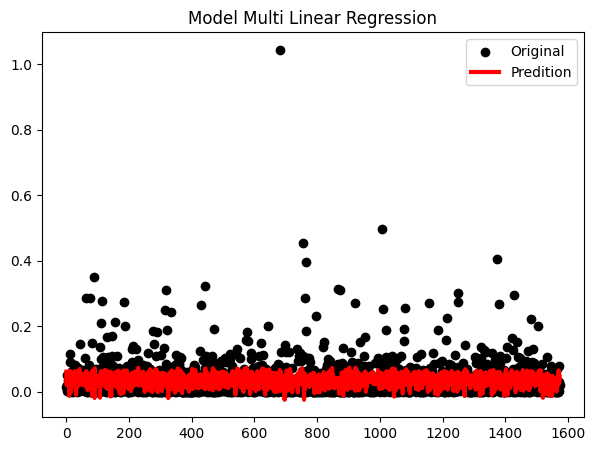

In [95]:
# Gráfico
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(range(len(y_test)), y_test, color = "black", label = "Original")
ax.plot(range(len(y_test)), y_prediction_MLR, color = "red", label = "Predition", linewidth=3)
ax.set_title("Model Multi Linear Regression")
plt.legend();

## Random Forest

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import metrics

score_RF = model_RF.score(x_test,y_test)
print("Accuracy: %.2f%%" % (score_RF*100.0))

score_RF_2 = model_RF_2.score(x_RF_test,y_test)
print("Accuracy: %.2f%%" % (score_RF_2*100.0))

Accuracy: 22.81%
Accuracy: 24.28%


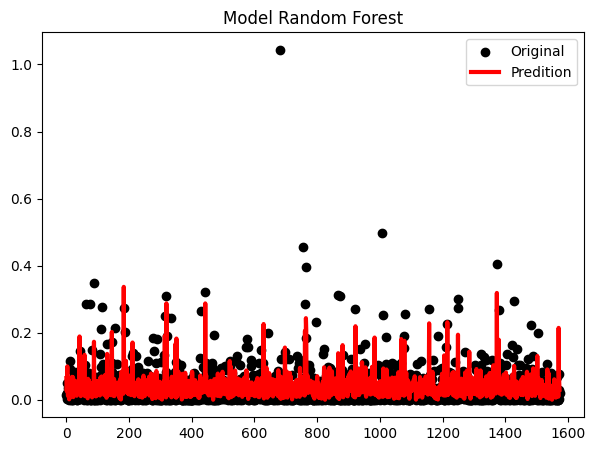

In [97]:
# Gráfico
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(range(len(y_test)), y_test, color = "black", label = "Original")
ax.plot(range(len(y_test)), y_prediction_RF, color = "red", label = "Predition", linewidth=3)
ax.set_title("Model Random Forest")
plt.legend();

# XGBoost Gradient Decent

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics

score_XGB = model_XGB.score(x_test,y_test)
print("Accuracy: %.2f%%" % (score_XGB*100.0))

score_XGB_2 = model_XGB_2.score(x_XGB_test,y_test)
print("Accuracy: %.2f%%" % (score_XGB_2*100.0))

Accuracy: 25.77%
Accuracy: 26.43%


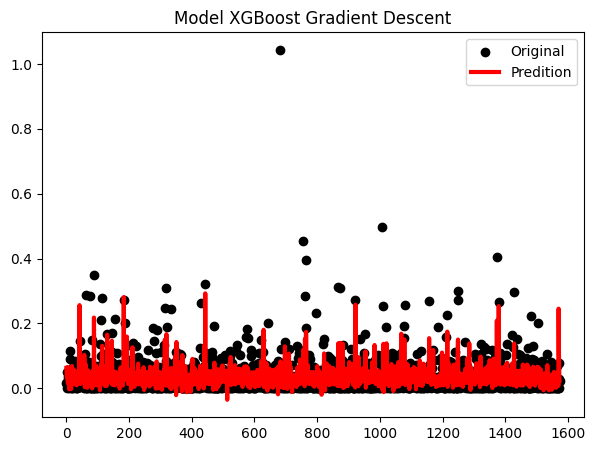

In [99]:
# Gráfico
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(range(len(y_test)), y_test, color = "black", label = "Original")
ax.plot(range(len(y_test)), y_prediction_XG, color = "red", label = "Predition", linewidth=3)
ax.set_title("Model XGBoost Gradient Descent")
plt.legend();

In [100]:
range(len(y_test))

range(0, 1574)

# Neural Network Model

In [101]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3934 entries, 0 to 3933
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           3934 non-null   int64  
 1   month          3934 non-null   int64  
 2   day            3934 non-null   int64  
 3   TemMaxValue    3934 non-null   float64
 4   TemMinValue    3934 non-null   float64
 5   HumidityValue  3934 non-null   int64  
 6   SunValue       3934 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 245.9 KB


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

sc=StandardScaler()
scaler = sc.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [104]:
model_MLP = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

model_MLP.fit(x_train_scaled, y_train.values.ravel())
y_prediction_MLP = model_MLP.predict(x_test_scaled)

model_MLP_2 = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

model_MLP_2.fit(x_train_scaled, y_train.values.ravel())
y_prediction_MLP = model_MLP.predict(x_test_scaled)

In [105]:
y_test2 = y_test.to_numpy()
y_test = np.reshape(y_test2,-1)

In [122]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction_MLP})
df_temp.head()

,Actual,Predicted
0,0.015313,0.084037
1,0.001045,0.054341
2,0.050088,0.038377
3,0.019512,0.021341
4,0.023127,0.029054


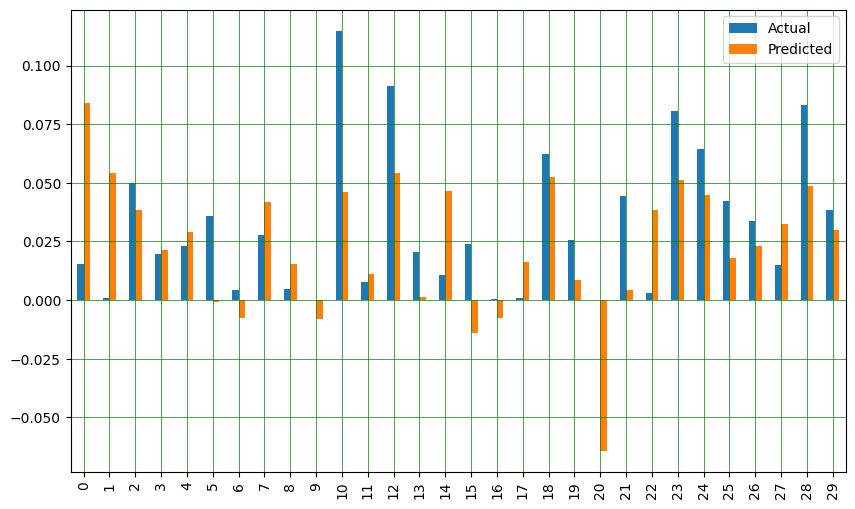

Mean Absolute Error: 0.03402989814378617
Mean Squared Error: 0.0033541313770721034
Root Mean Squared Error: 0.05791486317925739


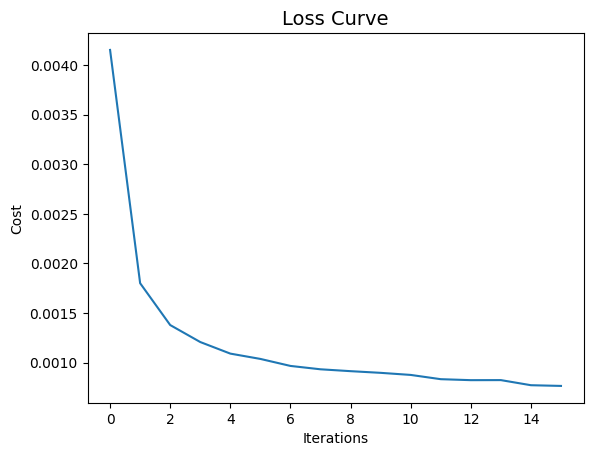

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}


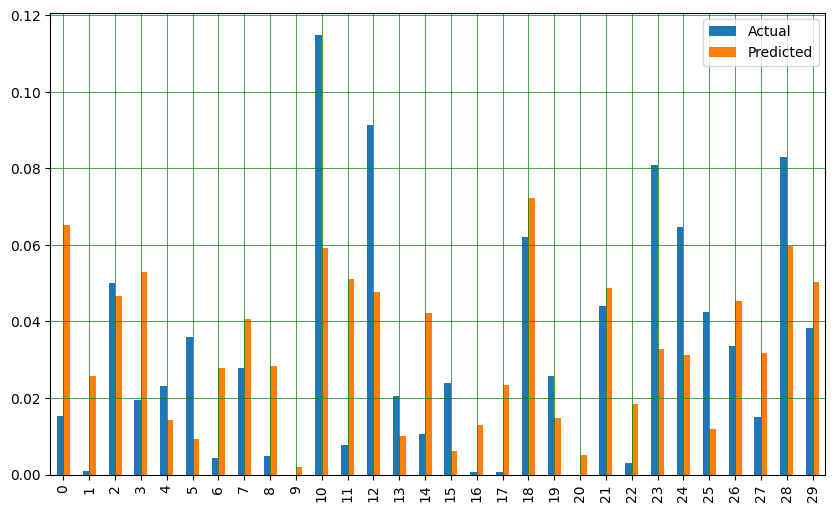

Mean Absolute Error: 0.03045008718667474
Mean Squared Error: 0.002963491165081916
Root Mean Squared Error: 0.05443795702524036


In [106]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction_MLP))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediction_MLP))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction_MLP)))

plt.plot(model_MLP.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.show()


param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(model_MLP, param_grid, n_jobs= -1, cv=5)
grid.fit(x_train_scaled, y_train)

print(grid.best_params_) 

grid_predictions = grid.predict(x_test_scaled) 

df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': grid_predictions})
df_temp2.head()

df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

In [121]:
sc_metrics_x=StandardScaler()
sc_metrics_y=StandardScaler()
scaler_metrics_x = sc_metrics_x.fit(x_train)
scaler_metrics_y = sc_metrics_y.fit(y_train)

x_test_scaled_metrics = scaler_metrics_x.transform(x_test)
y_test_scaled_metrics = scaler_metrics_y.transform(y_test.reshape(-1, 1))

score_MLP = model_MLP.score(x_test_scaled_metrics,y_test_scaled_metrics)
print("Accuracy: %.2f%%" % (score_MLP*100.0))

#score_MLP_2 = model_MLP_2.score(x_MLP_test,y_test)
#print("Accuracy: %.2f%%" % (score_MLP_2*100.0))

Accuracy: 1.60%


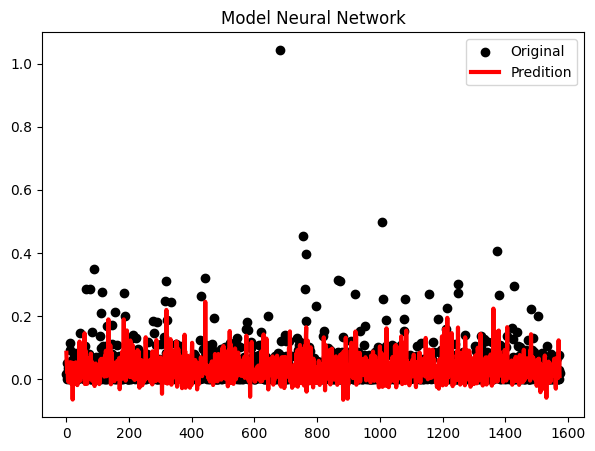

In [108]:
# Gráfico
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(range(len(y_test)), y_test, color = "black", label = "Original")
ax.plot(range(len(y_test)), y_prediction_MLP, color = "red", label = "Predition", linewidth=3)
ax.set_title("Model Neural Network")
plt.legend();

In [109]:
!pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=c9c3b176070b68d2801c46bf0ed9f48945cab9e1179520518ead0625bcc0a396
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [110]:
import ppscore as pps

In [111]:

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

warnings.filterwarnings("ignore")

In [124]:
dataset_pps = dataset[['SunValue', 'TemMinValue', 'TemMaxValue', 'HumidityValue', 'PrecipitationValue', 'year', 'month', 'day']].copy()

In [125]:
import re

#dataset_pps = dataset_pps.astype(float)
#dataset_pps['SunValue'] = dataset_pps['SunValue'].astype(float)
print(dataset_pps.dtypes)

SunValue              float64
TemMinValue           float64
TemMaxValue           float64
HumidityValue           int64
PrecipitationValue    float64
year                    int64
month                   int64
day                     int64
dtype: object


In [126]:
dataset_pps

,SunValue,TemMinValue,TemMaxValue,HumidityValue,PrecipitationValue,year,month,day
0,0.264286,5.2,22.6,44,0.231707,2005,4,19
1,0.000000,8.6,21.2,66,0.040418,2005,4,20
2,0.157143,7.0,20.4,89,0.011150,2005,4,21
3,0.192857,9.5,21.8,63,0.008727,2005,4,22
4,0.007143,8.2,20.8,76,0.026829,2005,4,23
...,...,...,...,...,...,...,...,...
3929,0.228571,7.6,20.4,66,0.031267,2021,7,27
3930,0.064286,10.8,20.0,62,0.044365,2021,7,28
3931,0.000000,10.4,22.0,54,0.023773,2021,7,29
3932,0.207143,9.2,19.6,53,0.023834,2021,7,30


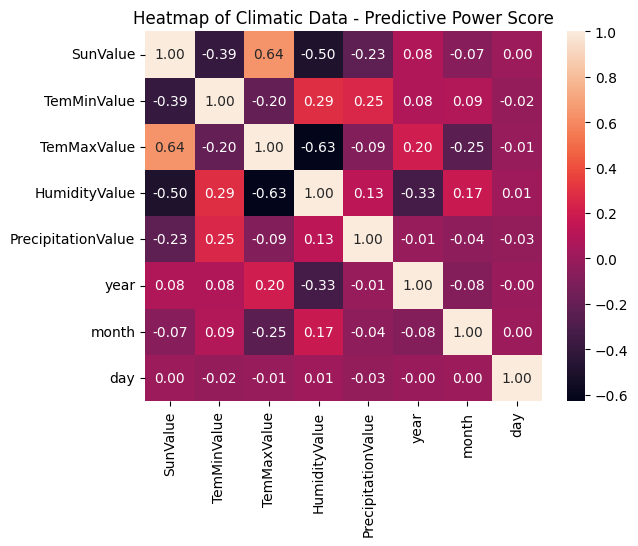

In [127]:
# annot=True displays the correlation values
sns.heatmap(dataset_pps.corr(),annot=True,fmt=".2f").set(title='Heatmap of Climatic Data - Predictive Power Score');

In [128]:
dataset_pps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3934 entries, 0 to 3933
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SunValue            3934 non-null   float64
 1   TemMinValue         3934 non-null   float64
 2   TemMaxValue         3934 non-null   float64
 3   HumidityValue       3934 non-null   int64  
 4   PrecipitationValue  3934 non-null   float64
 5   year                3934 non-null   int64  
 6   month               3934 non-null   int64  
 7   day                 3934 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 276.6 KB


In [129]:
print(dataset_pps)

      SunValue  TemMinValue  TemMaxValue  HumidityValue  PrecipitationValue  \
0     0.264286          5.2         22.6             44            0.231707   
1     0.000000          8.6         21.2             66            0.040418   
2     0.157143          7.0         20.4             89            0.011150   
3     0.192857          9.5         21.8             63            0.008727   
4     0.007143          8.2         20.8             76            0.026829   
...        ...          ...          ...            ...                 ...   
3929  0.228571          7.6         20.4             66            0.031267   
3930  0.064286         10.8         20.0             62            0.044365   
3931  0.000000         10.4         22.0             54            0.023773   
3932  0.207143          9.2         19.6             53            0.023834   
3933  0.557143          7.0         23.0             46            0.004353   

      year  month  day  
0     2005      4   19  
1

In [130]:
plt.figure(figsize=(16,12))
correlations = pps.matrix(dataset_pps)
sns.heatmap(correlations,annot=True).set(title='Heatmap of Climatic Data - Pearson Correlations');

ValueError: ignored

<Figure size 1600x1200 with 0 Axes>